In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
file_path = 'spambase/spambase.data'
data = pd.read_csv(file_path, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]  

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((3450, 57), (1151, 57), (3450,), (1151,))

In [4]:
scalar = StandardScaler()
X_train =scalar.fit_transform(X_train)
X_test =scalar.transform(X_test)

In [10]:


# Range of 'T' values to try (you may adjust this based on your computation resources)
T_values = [10**ii for ii in range(1,5)]

# Initialize arrays to store average CV errors and standard deviations
cv_errors = []
cv_std_devs = []

# Perform cross-validation for each value of T
for T in T_values:
    print(f'T = {T}')
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=T)
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(f'CV error: {1 - np.mean(scores):.4f} ± {np.std(scores):.4f}')
    cv_errors.append(np.mean(scores))
    cv_std_devs.append(np.std(scores))

T = 10
CV error: 0.0838 ± 0.0242
T = 100
CV error: 0.0626 ± 0.0240
T = 1000
CV error: 0.0701 ± 0.0235
T = 10000
CV error: 0.0788 ± 0.0288


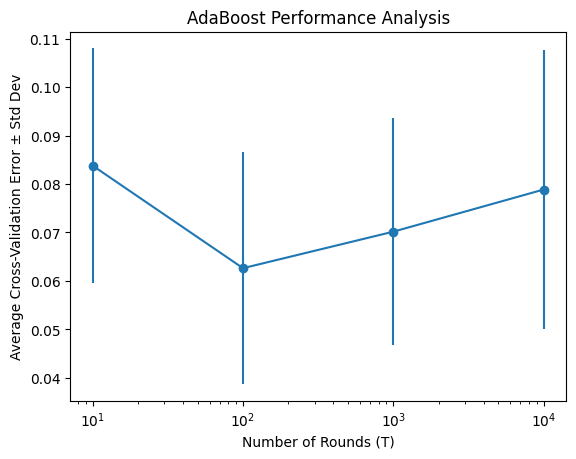

In [11]:
# Plot average CV error ± one standard deviation for each T
cv_errors = np.array(cv_errors)
cv_std_devs = np.array(cv_std_devs)
plt.errorbar(T_values, 1 - cv_errors, yerr=cv_std_devs, fmt='-o')
plt.xlabel('Number of Rounds (T)')
plt.ylabel('Average Cross-Validation Error ± Std Dev')
plt.xscale('log')
plt.title('AdaBoost Performance Analysis')
plt.show()

In [21]:
# Select the best T (T*) with the lowest CV error
T_star = T_values[np.argmax(cv_errors)]
T_star

100

The optimal number of boosting is 100.

In [23]:
# Train AdaBoost on the entire training set using T* and plot errors
train_errors = []
test_errors = []
for t in range(1, 500):
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=t)
    model.fit(X_train, y_train)
    train_errors.append(1 - model.score(X_train, y_train))
    test_errors.append(1 - model.score(X_test, y_test))

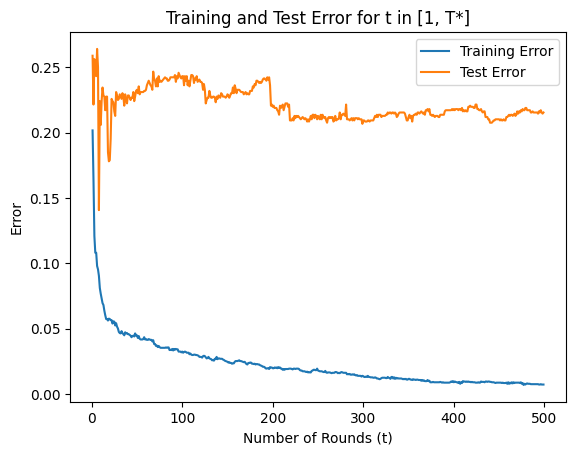

In [25]:
# Plot the training and test errors
plt.figure()
plt.plot(range(1, 500), train_errors, label='Training Error')
plt.plot(range(1, 500), test_errors, label='Test Error')
plt.xlabel('Number of Rounds (t)')
plt.ylabel('Error')
plt.title('Training and Test Error for t in [1, T*]')
plt.legend()
plt.show()